# Scenario
Bellabeat, a high-tech manufacturer of health-focused products for women. It has been collecting data on activity, sleep, stress, and reproductive health. The company's founder believes that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has
asked to analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

# About the data set:
The data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

# 1. Ask Questions to Make Data-Driven Decisions

1. What is the average number of steps taken per day by users?
2. How does the total daily distance relate to the number of steps?
3. How many users meeting the recommended 10,000 steps per day?
4. On which days of the week are users most or least active?
5. Is there a correlation between active minutes and total calories burned?
6. What is the average sleep duration for users?
7. Are there specific times of the day when users are more likely to be sedentary?
8. Do users burn more calories on days they get more sleep?

* Are there noticeable differences in sleep patterns on weekdays versus weekends?
* During which time of day are users most active?
* How does physical activity impact sleep duration?
* How many users consistently meet sleep goals?
* How do users who exceed their activity goals differ in their habits from those who do not?
* What time management patterns can help improve users' physical activity levels?

# 2. Prepare Data for Exploration


In [34]:
library(tidyverse) 

In [35]:
daily_activity <- read_csv("/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [36]:
daily_sleep <- read_csv("/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
steps_hourly <- read_csv("/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
calories_hourly <- read_csv("/kaggle/input/bellabeat-dataset/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 3. Process Data from Dirty to Clean


In [39]:
# Converting 'Id' variable to character class
daily_activity$Id <- as.character(daily_activity$Id)

daily_sleep$Id <- as.character(daily_sleep$Id)

steps_hourly$Id <- as.character(steps_hourly$Id)

calories_hourly$Id <- as.character(calories_hourly$Id)


glimpse(daily_activity)
glimpse(daily_sleep)
glimpse(steps_hourly)
glimpse(calories_hourly)

Rows: 940
Columns: 15
$ Id                       <chr> "1503960366", "1503960366", "1503960366", "15…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [40]:
# Converting 'ActivityDate' to date class
daily_activity_clean <- daily_activity %>% 
mutate(Activity_date = as.Date(ActivityDate, format = ('%m/%d/%Y')))

daily_sleep_clean <- daily_sleep %>%
mutate(Sleep_day = as.Date(SleepDay, format = ('%m/%d/%Y')))

calories_hourly$ActivityHour <- as.POSIXct(calories_hourly$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p")

calories_hourly_clean <- calories_hourly %>%
mutate(Date= date(ActivityHour), Hour= hms(format(ActivityHour, "%H:%M:%S")))

steps_hourly$ActivityHour <- as.POSIXct(steps_hourly$ActivityHour, format = "%m/%d/%Y %I:%M:%S %p") 

steps_hourly_clean <- steps_hourly %>%
mutate(Date= date(ActivityHour), Hour= hms(format(ActivityHour, "%H:%M:%S")))

glimpse(daily_activity_clean)
glimpse(daily_sleep_clean)
glimpse(calories_hourly_clean)
glimpse(steps_hourly_clean)

Rows: 940
Columns: 16
$ Id                       <chr> "1503960366", "1503960366", "1503960366", "15…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

In [41]:
summary(daily_activity_clean)

      Id            ActivityDate         TotalSteps    TotalDistance   
 Length:940         Length:940         Min.   :    0   Min.   : 0.000  
 Class :character   Class :character   1st Qu.: 3790   1st Qu.: 2.620  
 Mode  :character   Mode  :character   Median : 7406   Median : 5.245  
                                       Mean   : 7638   Mean   : 5.490  
                                       3rd Qu.:10727   3rd Qu.: 7.713  
                                       Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance SedentaryActiveD

In [42]:
# Checking for missing values
sum(is.na(daily_activity_clean))
sum(is.na(daily_sleep_clean))
sum(is.na(calories_hourly_clean))
sum(is.na(steps_hourly_clean))

[1] 0

[1] 0

[1] 0

[1] 0

In [43]:
# Checking for duplicates
sum(duplicated(daily_activity_clean))
sum(duplicated(daily_sleep_clean)) # Found 3 duplicates
sum(duplicated(calories_hourly_clean))
sum(duplicated(steps_hourly_clean))

[1] 0

[1] 3

[1] 0

[1] 0

In [44]:
daily_sleep_unique <- distinct(daily_sleep_clean)
sum(duplicated(daily_sleep_unique))

[1] 0

## 3.1 Merging datasets

In [45]:
merged_activity_sleep <- merge(daily_sleep_unique, daily_activity_clean, by.x = c('Id', 'Sleep_day'), by.y = c('Id', 'Activity_date'))

In [46]:
merged_calories_steps <- merge(calories_hourly_clean, steps_hourly_clean, by.x= c('Id', 'Date', 'Hour'), by.y= c('Id', 'Date', 'Hour'))

In [47]:
## Checking for duplicates and NA in merged datasets
sum(is.na(merged_activity_sleep))
sum(is.na(merged_calories_steps))

sum(duplicated(merged_activity_sleep))
sum(duplicated(merged_calories_steps))

[1] 0

[1] 0

[1] 0

[1] 0

# 4. Analyze Data to Answer Questions


### 4.1 What is the average number of steps taken per day?

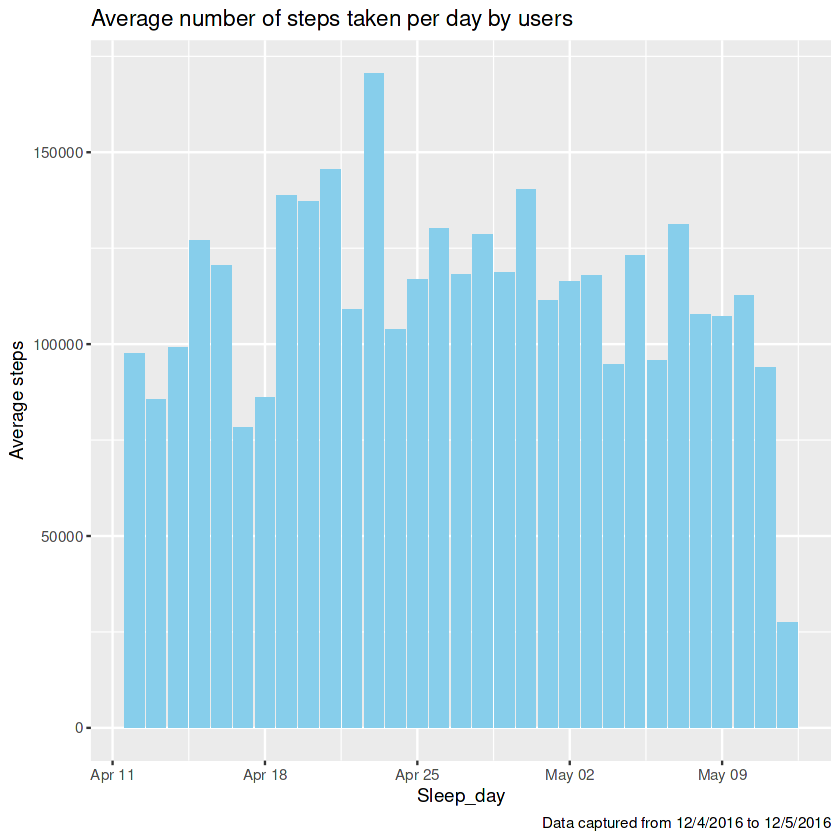

In [48]:
merged_activity_sleep %>%
group_by(Sleep_day) %>%
mutate(Average_daily_steps = mean(TotalSteps)) %>%
ggplot(aes(x= Sleep_day, y = TotalSteps))+
geom_bar(stat = "identity", fill = "skyblue")+
labs(title = "Average number of steps taken per day by users", y= "Average steps", caption= 'Data captured from 12/4/2016 to 12/5/2016')

### 4.2 How does the total daily distance relate to the number of steps?

`geom_smooth()` using formula = 'y ~ x'


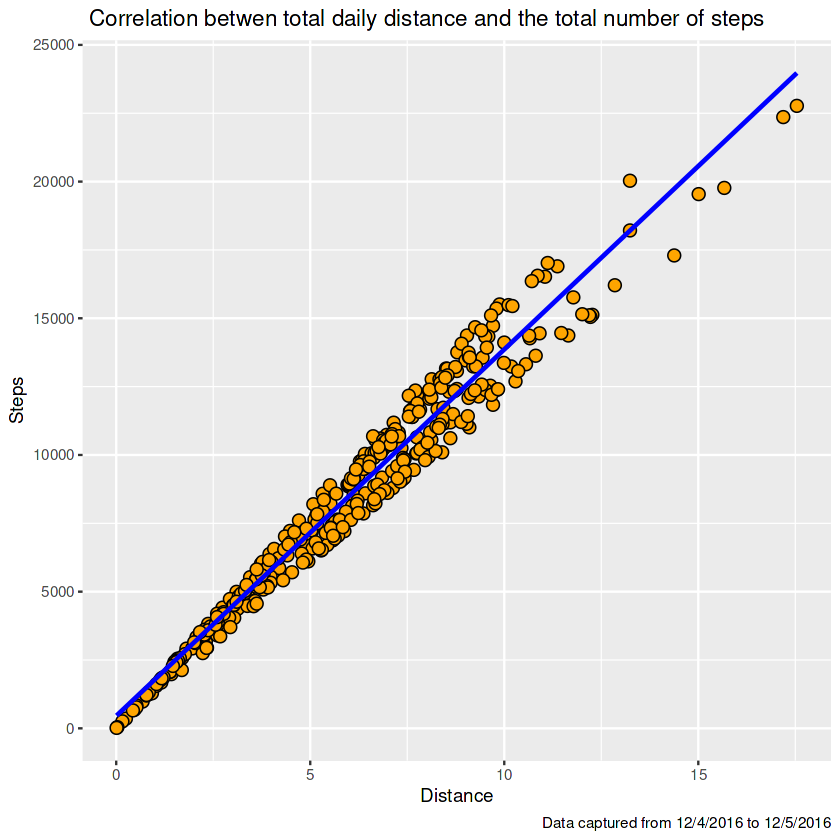

In [49]:
merged_activity_sleep %>%
ggplot(aes(x= TotalDistance, y = TotalSteps))+
geom_point(size = 3, shape = 21, color = "black", fill = "orange")+
geom_smooth(method = "lm", color = "blue", se = FALSE)+
labs(title = " Correlation betwen total daily distance and the total number of steps", y= "Steps", x= "Distance", caption= 'Data captured from 12/4/2016 to 12/5/2016')

### 4.3 How many users meeting the recommended 10,000 steps per day?

In [50]:
merged_activity_sleep %>%
  mutate(goal_met = ifelse(TotalSteps >= 10000, "Met Goal", "Did Not Meet Goal"))

Id,Sleep_day,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,⋯,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,goal_met
<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,2016-04-12,4/12/2016 12:00:00 AM,1,327,346,4/12/2016,13162,8.50,8.50,⋯,1.88,0.55,6.06,0,25,13,328,728,1985,Met Goal
1503960366,2016-04-13,4/13/2016 12:00:00 AM,2,384,407,4/13/2016,10735,6.97,6.97,⋯,1.57,0.69,4.71,0,21,19,217,776,1797,Met Goal
1503960366,2016-04-15,4/15/2016 12:00:00 AM,1,412,442,4/15/2016,9762,6.28,6.28,⋯,2.14,1.26,2.83,0,29,34,209,726,1745,Did Not Meet Goal
1503960366,2016-04-16,4/16/2016 12:00:00 AM,2,340,367,4/16/2016,12669,8.16,8.16,⋯,2.71,0.41,5.04,0,36,10,221,773,1863,Met Goal
1503960366,2016-04-17,4/17/2016 12:00:00 AM,1,700,712,4/17/2016,9705,6.48,6.48,⋯,3.19,0.78,2.51,0,38,20,164,539,1728,Did Not Meet Goal
1503960366,2016-04-19,4/19/2016 12:00:00 AM,1,304,320,4/19/2016,15506,9.88,9.88,⋯,3.53,1.32,5.03,0,50,31,264,775,2035,Met Goal
1503960366,2016-04-20,4/20/2016 12:00:00 AM,1,360,377,4/20/2016,10544,6.68,6.68,⋯,1.96,0.48,4.24,0,28,12,205,818,1786,Met Goal
1503960366,2016-04-21,4/21/2016 12:00:00 AM,1,325,364,4/21/2016,9819,6.34,6.34,⋯,1.34,0.35,4.65,0,19,8,211,838,1775,Did Not Meet Goal
1503960366,2016-04-23,4/23/2016 12:00:00 AM,1,361,384,4/23/2016,14371,9.04,9.04,⋯,2.81,0.87,5.36,0,41,21,262,732,1949,Met Goal


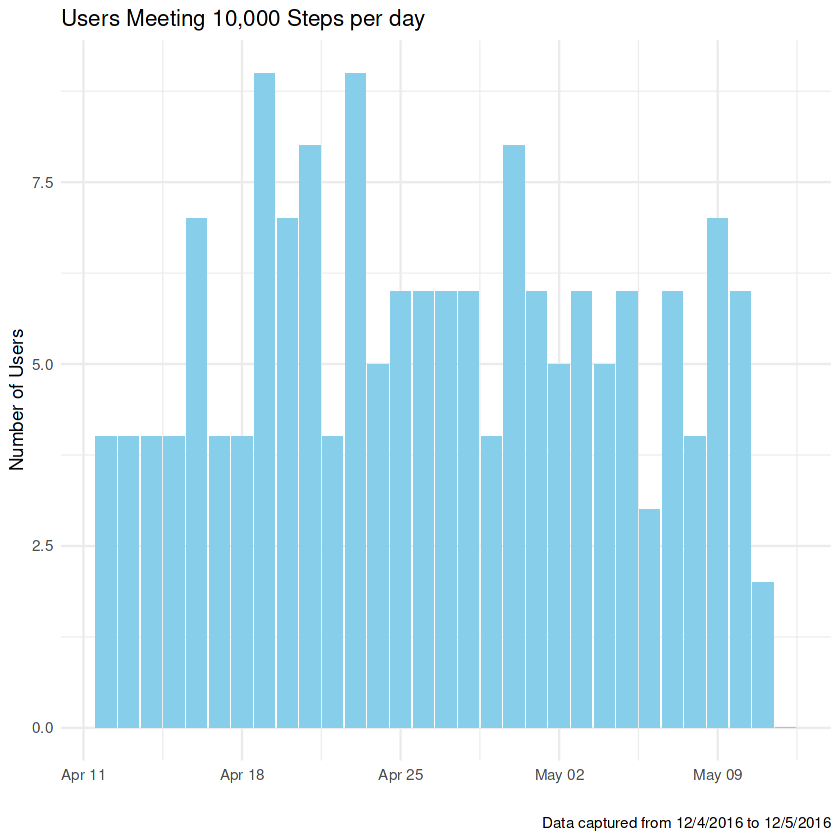

In [51]:
merged_activity_sleep %>% 
    group_by(Sleep_day) %>%
    summarize(users_meeting_goal = sum(TotalSteps >= 10000)) %>%
ggplot(aes(x = Sleep_day, y = users_meeting_goal)) +
  geom_bar(stat = "identity", fill = "skyblue") +
 labs(title = "Users Meeting 10,000 Steps per day", x = "", y = "Number of Users", caption= 'Data captured from 12/4/2016 to 12/5/2016') +
   theme_minimal()

### 4.4 On which days of the week are users most or least active?

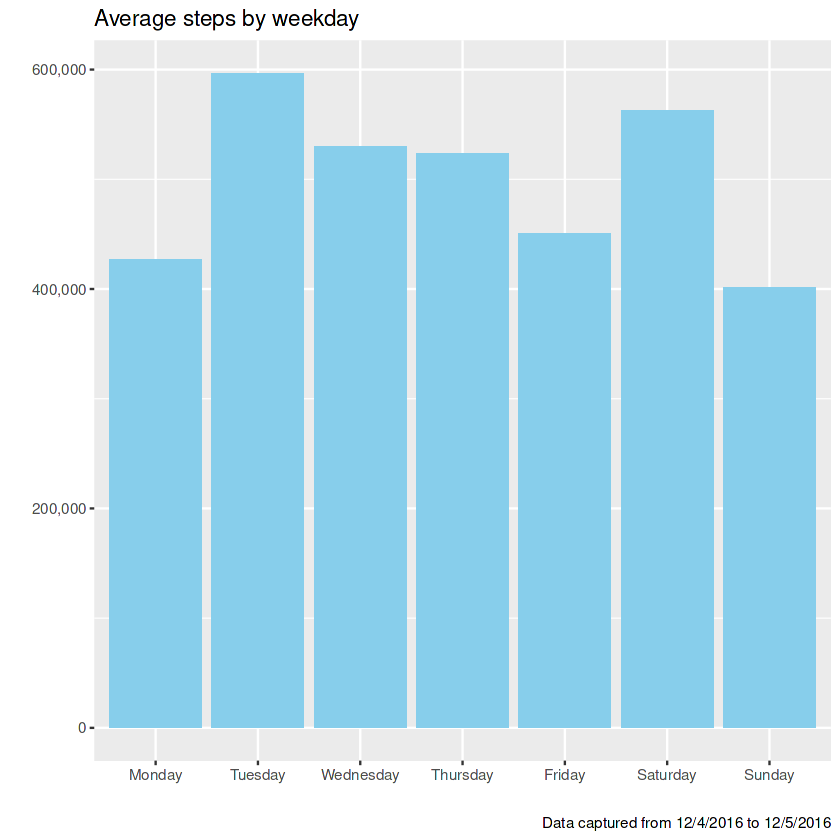

In [52]:
merged_activity_sleep$weekday <- weekdays(merged_activity_sleep$Sleep_day)

merged_activity_sleep$weekday <- factor(
  merged_activity_sleep$weekday, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))

merged_activity_sleep %>% 
group_by(weekday) %>%
mutate(Average_steps = mean(TotalSteps)) %>%
ggplot(aes(x= weekday, y= Average_steps))+
geom_bar(stat = "identity", fill = "skyblue")+
scale_y_continuous(labels = scales::comma)+
labs(title = "Average steps by weekday", x="", y= "", caption= 'Data captured from 12/4/2016 to 12/5/2016')

### 4.5 Is there a correlation between active minutes and total calories burned?

`geom_smooth()` using formula = 'y ~ x'


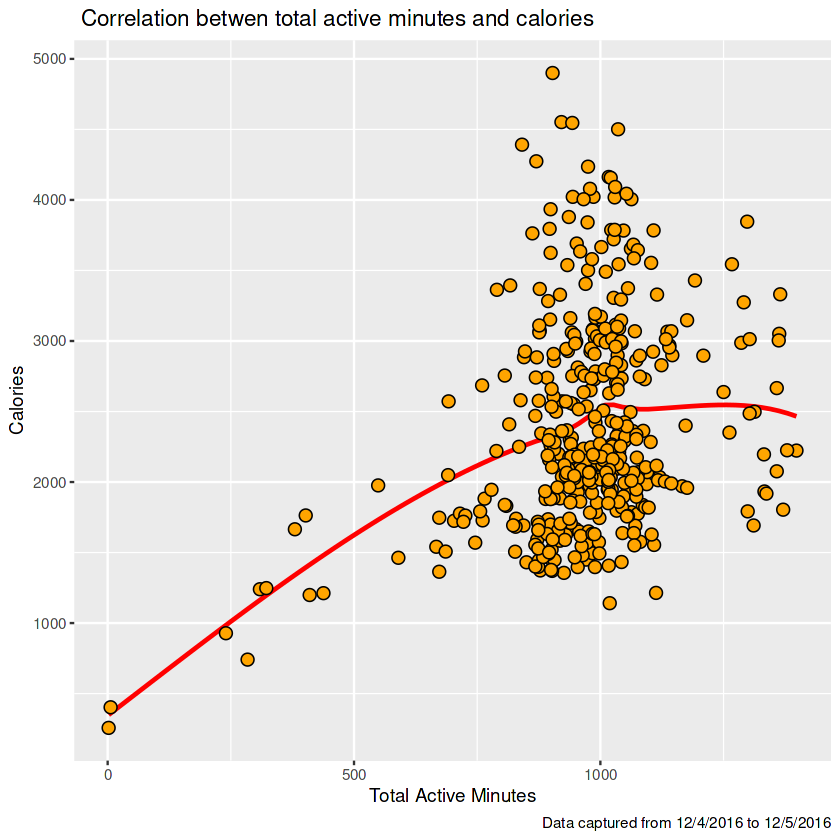

In [53]:
merged_activity_sleep %>%
mutate(Total_active_minutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes +SedentaryMinutes) %>%
ggplot(aes(x= Total_active_minutes, y= Calories))+
geom_smooth(method = "loess", color = "red", se = FALSE)+
geom_point(size = 3, shape = 21, color = "black", fill = "orange")+
labs(title = " Correlation betwen total active minutes and calories", y= "Calories", x= "Total Active Minutes", caption= 'Data captured from 12/4/2016 to 12/5/2016')

### 4.6 What is the average sleep duration for users?

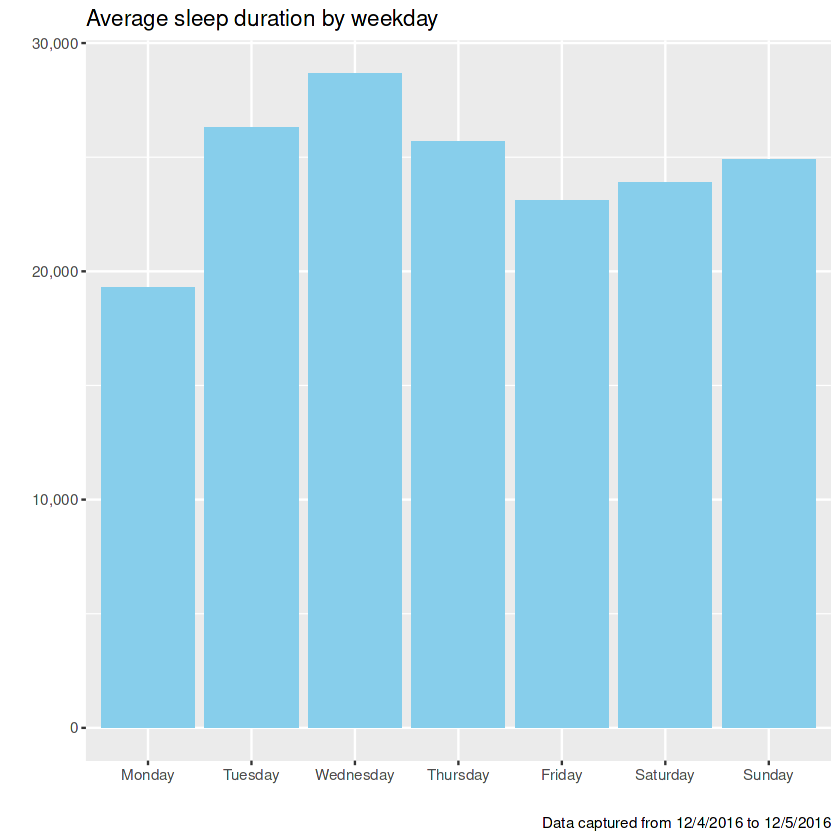

In [54]:
merged_activity_sleep %>% 
group_by(weekday) %>%
mutate(Average_sleep_duration = mean(TotalMinutesAsleep)) %>%
ggplot(aes(x= weekday, y= TotalMinutesAsleep))+
geom_bar(stat = "identity", fill = "skyblue")+
scale_y_continuous(labels = scales::comma)+
labs(title = "Average sleep duration by weekday", x="", y= "", caption= 'Data captured from 12/4/2016 to 12/5/2016')

### 4.7 Are there specific days of the week when users are more likely to be sedentary?.

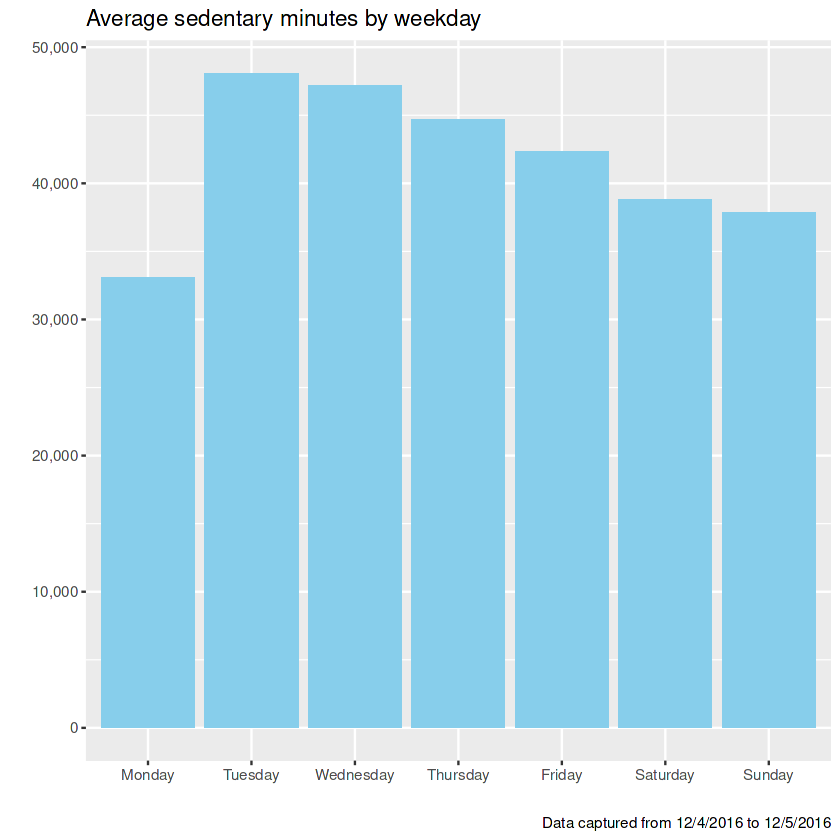

In [55]:
merged_activity_sleep %>% 
group_by(weekday) %>%
mutate(Average_Sedentary_Minutes = mean(SedentaryMinutes)) %>%
ggplot(aes(x= weekday, y= Average_Sedentary_Minutes))+
geom_bar(stat = "identity", fill = "skyblue")+
scale_y_continuous(labels = scales::comma)+
labs(title = "Average sedentary minutes by weekday", x="", y= "", caption= 'Data captured from 12/4/2016 to 12/5/2016')

### 4.8 Do users burn more calories on days they get more sleep?

`geom_smooth()` using formula = 'y ~ x'


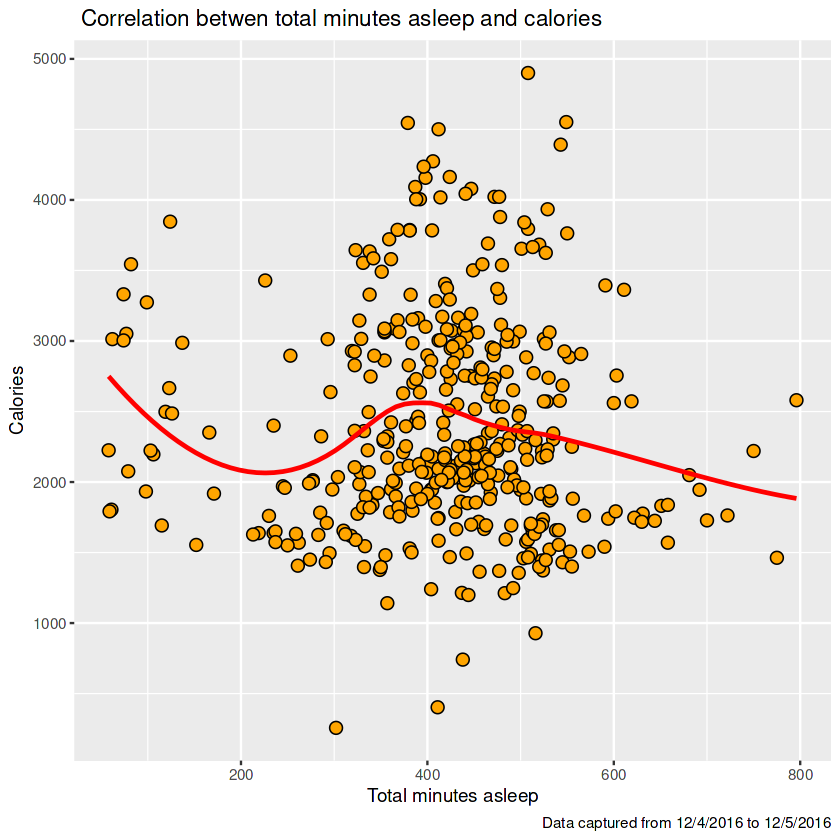

In [56]:
merged_activity_sleep %>%
ggplot(aes(x= TotalMinutesAsleep, y= Calories))+
geom_point(size = 3, shape = 21, color = "black", fill = "orange")+
geom_smooth(method = "loess", color = "red", se = FALSE)+
labs(title = " Correlation betwen total minutes asleep and calories", y= "Calories", x= "Total minutes asleep", caption= 'Data captured from 12/4/2016 to 12/5/2016')


In [57]:
glimpse(merged_activity_sleep)

Rows: 410
Columns: 21
$ Id                       <chr> "1503960366", "1503960366", "1503960366", "15…
$ Sleep_day                <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ SleepDay                 <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 …
$ TotalSleepRecords        <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep       <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, …
$ TotalTimeInBed           <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, …
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/15/2016", "4/16/…
$ TotalSteps               <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ TotalDistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ ModeratelyActive

### 4.9 How many users consistently meet sleep goals?

# 5. Share Data Through the Art of Visualization